# NASA Astronaut Selection Analysis (Python Version)
This notebook analyzes NASA's astronaut dataset from 1959 to 2009 using Python tools. It includes demographic, educational, and career-related visualizations.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set(style='whitegrid')
os.makedirs('figures', exist_ok=True)  # Ensure figures folder exists

## Load Dataset

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
df = pd.read_excel('astronauts.xlsx')
df.head()

,Name,Year,Group,Status,Birth Date,Birth Place,Gender,Alma Mater,Undergraduate Major,Graduate Major,Military Rank,Military Branch,Space Flights,Space Flight (hr),Space Walks,Space Walks (hr),Missions
0,Joseph M. Acaba,2004,19,Active,5/17/1967,"Inglewood, CA",Male,University of California-Santa Barbara; Univer...,Geology,Geology,Captain,US Army (Retired),2,3307,2,13.0,"STS-119 (Discovery), ISS-31/32 (Soyuz)"
1,Loren W. Acton,2004,19,Retired,1936-07-03 00:00:00,"Lewiston, MT",Male,Montana State University; University of Colorado,Engineering Physics,Solar Physics,Captain,US Army (Retired),1,190,0,0.0,STS 51-F (Challenger)
2,James C. Adamson,1984,10,Retired,1946-03-03 00:00:00,"Warsaw, NY",Male,US Military Academy; Princeton University,Engineering,Aerospace Engineering,Colonel,US Army (Retired),2,334,0,0.0,"STS-28 (Columbia), STS-43 (Atlantis)"
3,Thomas D. Akers,1987,12,Retired,5/20/1951,"St. Louis, MO",Male,University of Missouri-Rolla,Applied Mathematics,Applied Mathematics,Colonel,US Air Force (Retired),4,814,4,29.0,"STS-41 (Discovery), STS-49 (Endeavor), STS-61 ..."
4,Buzz Aldrin,1963,3,Retired,1/20/1930,"Montclair, NJ",Male,US Military Academy; MIT,Mechanical Engineering,Astronautics,Colonel,US Air Force (Retired),2,289,2,8.0,"Gemini 12, Apollo 11"


## Summary Statistics

In [10]:
df.describe(include='all')

,Name,Year,Group,Status,Birth Date,Birth Place,Gender,Alma Mater,Undergraduate Major,Graduate Major,Military Rank,Military Branch,Space Flights,Space Flight (hr),Space Walks,Space Walks (hr),Missions
count,357,357.000000,357.000000,357,357,357,357,357,357,357,357,357,357.000000,357.000000,357.000000,357.000000,356
unique,357,NaN,NaN,4,348,272,2,280,84,143,12,14,NaN,NaN,NaN,NaN,305
top,George D. Zamka,NaN,NaN,Retired,10/27/1946,"Cleveland, OH",Male,US Naval Academy,Physics,Aeronautical Engineering,Colonel,US Navy (Retired),NaN,NaN,NaN,NaN,STS 51-F (Challenger)
freq,1,NaN,NaN,220,2,8,307,12,37,33,163,105,NaN,NaN,NaN,NaN,6
mean,NaN,1985.081232,11.400560,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.364146,1249.266106,1.246499,7.707283,NaN
std,NaN,13.118373,5.101696,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.428700,1896.759857,2.056989,13.367973,NaN
min,NaN,1959.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,1978.000000,8.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,289.000000,0.000000,0.000000,NaN
50%,NaN,1987.000000,12.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,590.000000,0.000000,0.000000,NaN
75%,NaN,1996.000000,16.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,1045.000000,2.000000,12.000000,NaN


## Gender Distribution

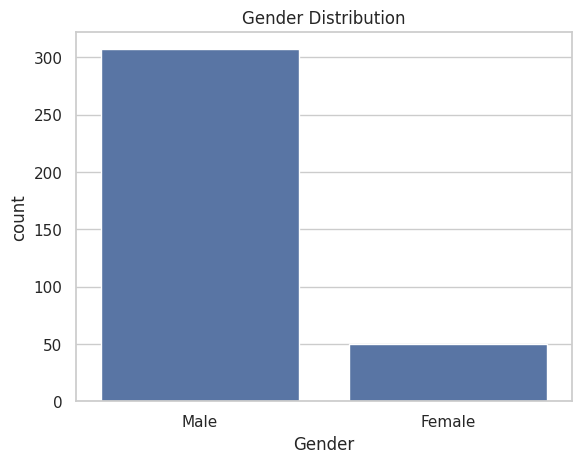

In [11]:
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.savefig('figures/gender_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

## Top 5 Military Ranks

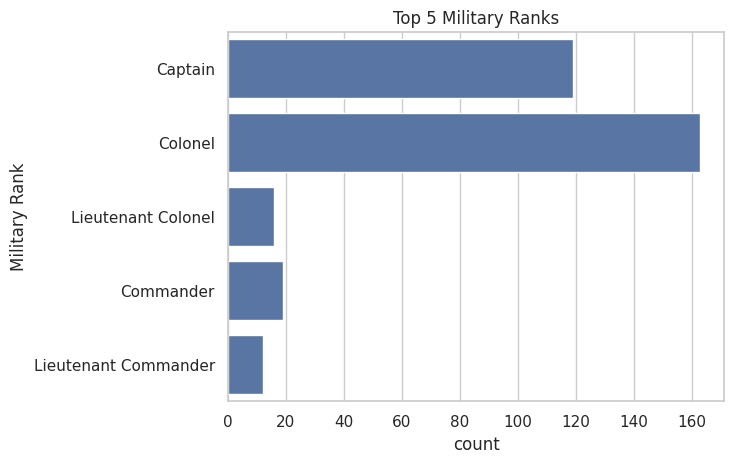

In [12]:
top_ranks = df['Military Rank'].value_counts().nlargest(5).index
sns.countplot(y='Military Rank', data=df[df['Military Rank'].isin(top_ranks)])
plt.title('Top 5 Military Ranks')
plt.savefig('figures/top_military_ranks.png', dpi=300, bbox_inches='tight')
plt.show()

## Top 5 Alma Maters

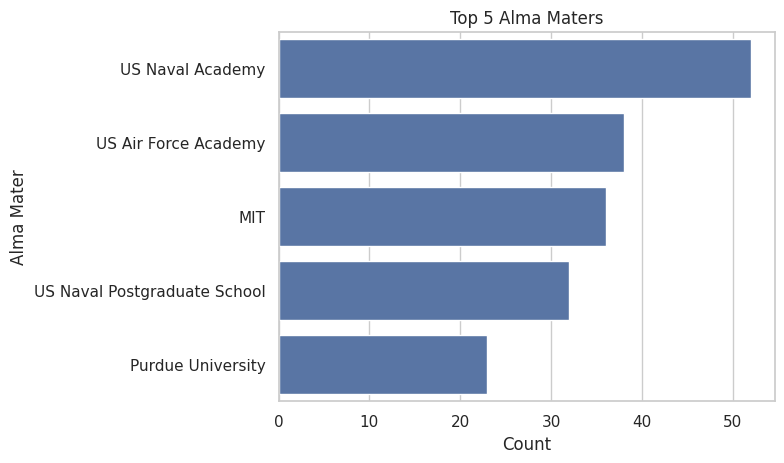

In [13]:
df['Alma Mater'] = df['Alma Mater'].astype(str)
top_colleges = df['Alma Mater'].str.split(';').explode().str.strip().value_counts().nlargest(5)
sns.barplot(x=top_colleges.values, y=top_colleges.index)
plt.title('Top 5 Alma Maters')
plt.xlabel('Count')
plt.savefig('figures/top_alma_maters.png', dpi=300, bbox_inches='tight')
plt.show()

## Distribution of Space Flights

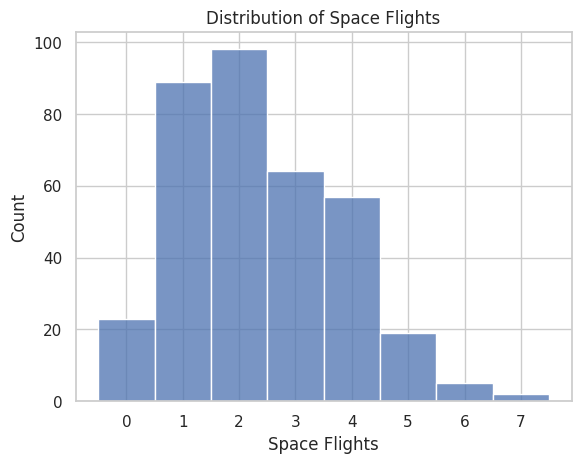

In [14]:
sns.histplot(df['Space Flights'], bins=range(0, df['Space Flights'].max() + 2), discrete=True)
plt.title('Distribution of Space Flights')
plt.savefig('figures/space_flights_distribution.png', dpi=300, bbox_inches='tight')
plt.show()